## Scientific Computation 2020 Lab 4

### Task 1: Shortest paths from BFS

The BFS code developed in lecture finds all reachable nodes from a source and computes the distance of the shortest path from the source to each reachable node:

In [1]:
import networkx as nx

def bfs(G,s):
    """
    Input:
    G: networkx graph
    x: source node

    Output:
    L2: Labels for all nodes in graph, 0=unreachable from source, 1=reachable
    L3: Shortest distance from source to nodes in graph
    """

    L1 = list(G.nodes) #Assumes nodes are numbered from 0 to N-1
    L2 = [0 for l in L1] #Labels
    L3 = [-1000 for l in L1] #Distances
    L4 = [[] for l in L1] #Paths 
    Q=[]
    Q.append(s)
    L2[s]=1
    L3[s]=0
    L4[s] = [s]
    while len(Q)>0:
        x = Q.pop(0) #remove node from front of queue
        print("***x=",x,' ***')
        for v in G.adj[x].keys():
            if L2[v]==0:
                Q.append(v) #add unexplored neighbors to back of queue
                L2[v]=1
                L3[v]=1+L3[x]
                #add code here
            
            print("v=",v)
            print("Q=",Q)
    return L2,L3

1. Modify the function above so that it returns a list, *L4*, whose *i+1th* element, *L4[i]* contains a list of nodes for the shortest path between the source and node *i*. For example, L4=[[0],[0,2,3,1],[0,2],[0,3]] would indicate that the shortest path between nodes 0 and 1 is 0->2->3->1. 

In [19]:
#New function here
def bfs_2(G,s):
    """
    Input:
    G: networkx graph
    x: source node

    Output:
    L2: Labels for all nodes in graph, 0=unreachable from source, 1=reachable
    L3: Shortest distance from source to nodes in graph
    L4: Path of shortest distance
    """

    L1 = list(G.nodes) #Assumes nodes are numbered from 0 to N-1
    L2 = [0 for l in L1] #Labels
    L3 = [-1000 for l in L1] #Distances
    L4 = [[] for l in L1] #Paths 
    Q=[]
    Q.append(s)
    L2[s]=1
    L3[s]=0
    L4[s] = [s]
    while len(Q)>0:
        x = Q.pop(0) #remove node from front of queue
        #print("***x=",x,' ***')
        for v in G.adj[x].keys():
            if L2[v]==0:
                Q.append(v) #add unexplored neighbors to back of queue
                L2[v]=1
                L3[v]=1+L3[x]
                #add code here
                L4[v] = L4[x].copy()
                L4[v].append(v)
            
            #print("v=",v)
            #print("Q=",Q)
    return L4

2. Test your function with a modestly-sized Barabasi-Albert graph and verify (using networkx) that it computes shortest-paths correctly:

[[0], [0, 1], [0, 1, 2], [0, 1, 3], [0, 1, 4], [0, 1, 3, 5], [0, 1, 6], [0, 1, 4, 7], [0, 1, 4, 7, 8], [0, 9]]


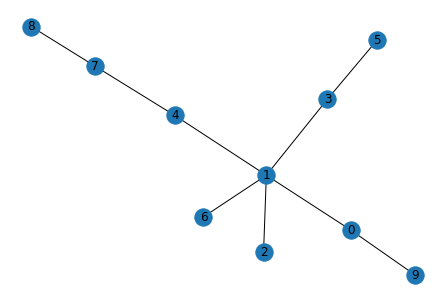

In [21]:
#Add code here
G = nx.barabasi_albert_graph(10, 1)
print(bfs_2(G, 0))
nx.draw(G, with_labels = True)

### Task 2: Code performance and memory

As you move to larger problems, memory usage becomes an increasingly important consideration when developing and analyzing codes. Generally, we wish to use as little memory as possible, but there are more subtle issues that can pop up as well.
Consider simple calculations with matrices. 2-D Numpy arrays store elements in *row-major* order which can influence the performance of seemingly similar operations with numpy arrays. Row-major order means that elements (i,j) and (i,j+1) are typically stored in adjacent locations in memory.

1) Construct a large *n x n* random matrix and: i) iterate across the rows of the matrix computing the standard deviation of each column and ii) iterate across the columns of the matrix computing the standard deviation of each row. Compare the walltime required by the two cases for a few different values of *n*. Is one case noticeably faster for large *n*?

In [31]:
import numpy as np
from time import time
#Add code here
for n in [100, 1000, 10000]:
    print("n = ", n)
    matrix = np.random.rand(n, n)
    # Rows
    t1 = time()
    for i in range(n):
        np.std(matrix[i])
    t2 = time()
    print("Iterate rows: ", t2 - t1)
    # Columns
    t1 = time()
    for i in range(n):
        np.std(matrix[:,i])
    t2 = time()
    print("Iterate columns: ", t2 - t1)

n =  100
Iterate rows:  0.0012755393981933594
Iterate columns:  0.0030336380004882812
n =  1000
Iterate rows:  0.0346064567565918
Iterate columns:  0.06788945198059082
n =  10000
Iterate rows:  0.9644794464111328
Iterate columns:  4.845293760299683


2) Now, repeat the calculations above, but replace the loops across rows or columns with the built-in method for computing standard deviations with numpy arrays. Do the timing results change?

In [36]:
import numpy as np
from time import time
#add code here
for n in [100, 1000, 10000]:
    print("n = ", n)
    matrix = np.random.rand(n, n)
    # Rows
    t1 = time()
    np.std(matrix, axis = 1)
    t2 = time()
    print("Iterate rows: ", t2 - t1)
    # Columns
    t1 = time()
    np.std(matrix, axis = 0)
    t2 = time()
    print("Iterate columns: ", t2 - t1)

n =  100
Iterate rows:  0.0
Iterate columns:  0.00348663330078125
n =  1000
Iterate rows:  0.012724637985229492
Iterate columns:  0.006858110427856445
n =  10000
Iterate rows:  0.9102990627288818
Iterate columns:  0.8736474514007568
